In [1]:
import sympy as sp
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [2]:
import sympy.physics.mechanics as me
me.init_vprinting()

In [3]:
# from sympy import symbols, Matrix
# m,R_0,S_ref,C_L,C_D,rho_0,H = symbols('m,R_0,S_ref,C_L,C_D,rho_0,H')

In [4]:
# from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
# from sympy import simplify, cos, sin
from sympy import *
f = zeros(6, 1)
ix = 6
iu = 1

x = Matrix(me.dynamicsymbols(
    'r theta phi v gamma psi', real=True))
u = Matrix(me.dynamicsymbols('sigma,', real=True))
# u = symbols('sigma')

r = x[0,0]
theta = x[1,0]
phi = x[2,0]
v = x[3,0] 
gamma = x[4,0] 
psi = x[5,0] 

sigma = u[0,0]

# rho = rho_0 * exp(-R_0/H*(sqrt(r*r)-1))
# L = R_0 * S_ref * C_L * rho * v * v / (2 * m)
# D = R_0 * S_ref * C_D * rho * v * v / (2 * m)

rho, L, D = me.dynamicsymbols('rho, L, D')

f[0,0] = v * sin(gamma)
f[1,0] = v * cos(gamma) * sin(psi) / (r * cos(phi))
f[2,0] = v * cos(gamma) * cos(psi) / r
f[3,0] = -D-(sin(gamma)/r**2)
f[4,0] = 1 / v * (L*cos(sigma)+(v**2 - 1/r)*(cos(gamma)/r))
f[5,0] = 1 / v * (L*sin(sigma)/cos(gamma)+v**2/r*cos(gamma)*sin(psi)*tan(phi))

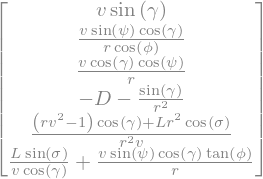

f[:,0] = v(t)*sin(gamma(t))
f[:,1] = v(t)*sin(psi(t))*cos(gamma(t))/(r(t)*cos(phi(t)))
f[:,2] = v(t)*cos(gamma(t))*cos(psi(t))/r(t)
f[:,3] = -D(t) - sin(gamma(t))/r(t)**2
f[:,4] = ((v(t)**2 - 1/r(t))*cos(gamma(t))/r(t) + L(t)*cos(sigma(t)))/v(t)
f[:,5] = (L(t)*sin(sigma(t))/cos(gamma(t)) + v(t)**2*sin(psi(t))*cos(gamma(t))*tan(phi(t))/r(t))/v(t)


In [5]:
display(simplify(f)) # f
for i in range(ix) :
    if f[i] == 0 :
        continue
    print("f[:,{:}] = {}".format(i,f[i]))

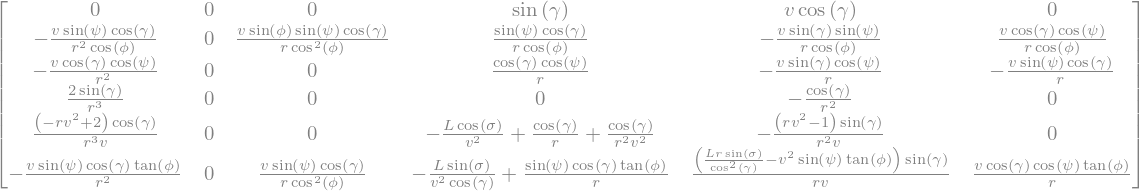

'fx[1,4]'

'fx[1,5]'

'fx[2,1]'

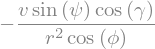

'fx[2,3]'

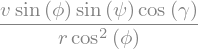

'fx[2,4]'

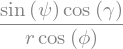

'fx[2,5]'

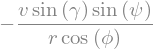

'fx[2,6]'

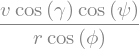

'fx[3,1]'

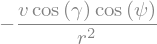

'fx[3,4]'

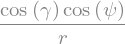

'fx[3,5]'

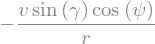

'fx[3,6]'

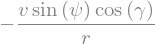

'fx[4,1]'

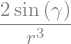

'fx[4,5]'

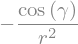

'fx[5,1]'

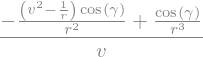

'fx[5,4]'

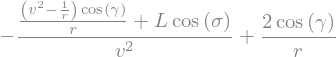

'fx[5,5]'

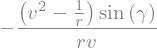

'fx[6,1]'

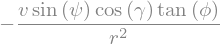

'fx[6,3]'

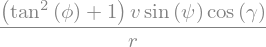

'fx[6,4]'

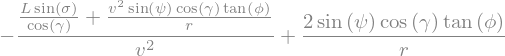

'fx[6,5]'

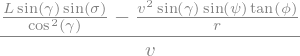

'fx[6,6]'

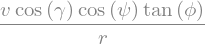

In [6]:
fx = f.jacobian(x)
display(simplify(fx))# A
for i in range(ix) :
    for j in range(ix) :
        if fx[i,j] == 0 :
            continue
#         print("fx[:,{:},{:}] = {}".format(i,j,fx[i,j]))
        display("fx[{:},{:}]".format(i+1,j+1),fx[i,j])

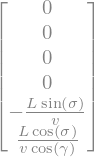

'fu[5,1]'

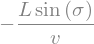

'fu[6,1]'

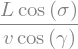

In [7]:
fu = f.jacobian(u)
display(simplify(fu))# B
for i in range(ix) :
    for j in range(iu) :
        if fu[i,j] == 0 :
            continue
#         print("fu[:,{:},{:}] = {}".format(i,j,fu[i,j]))
        display("fu[{:},{:}]".format(i+1,j+1),fu[i,j])

In [19]:
g = zeros(3, 1)
k_Q, k_q, k_n = me.dynamicsymbols('k_Q, k_q, k_n')
beta,Re,C_L,C_D = me.dynamicsymbols('beta,Re,C_L,C_D')
g[0,0] = k_Q * exp(-0.5*beta*Re*(r-1)) *v*v*v - 1
g[1,0] = k_q * exp(-beta*Re*(r-1))*v*v-1
g[2,0] = k_n * exp(-beta*Re*(r-1))*v*v*sqrt(C_L*C_L+C_D*C_D) - 1

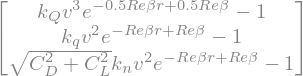

g[:,0] = k_Q(t)*v(t)**3*exp(-0.5*(r(t) - 1)*Re(t)*beta(t)) - 1
g[:,1] = k_q(t)*v(t)**2*exp(-(r(t) - 1)*Re(t)*beta(t)) - 1
g[:,2] = sqrt(C_D(t)**2 + C_L(t)**2)*k_n(t)*v(t)**2*exp(-(r(t) - 1)*Re(t)*beta(t)) - 1


In [20]:
display(simplify(g)) # f
for i in range(3) :
    if g[i] == 0 :
        continue
    print("g[:,{:}] = {}".format(i,g[i]))

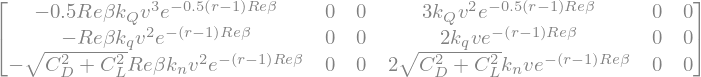

'gx[1,1]'

'gx[1,4]'

'gx[2,1]'

'gx[2,4]'

'gx[3,1]'

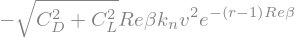

'gx[3,4]'

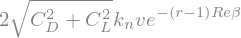

In [21]:
gx = g.jacobian(x)
display(simplify(gx))# A
for i in range(3) :
    for j in range(ix) :
        if gx[i,j] == 0 :
            continue
#         print("fx[:,{:},{:}] = {}".format(i,j,fx[i,j]))
        display("gx[{:},{:}]".format(i+1,j+1),gx[i,j])